<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW12/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import pylab as pl
import numpy as np
np.random.seed(104049)

# Import Data

In [0]:
(train_input, train_labels), (test_input,
                              test_labels) = keras.datasets.mnist.load_data()

# Understanding

## Task 1

In [29]:
print("The train input shape is", train_input.shape, '\n',
      "and the labels shape is", train_labels.shape)

The train input shape is (60000, 28, 28) 
 and the labels shape is (60000,)


## Task 2

In [30]:
print("the label of the 10th observation is", train_labels[9])

the label of the 10th observation is 4


## Task 3

In [31]:
print("train_input[1].shape: ", train_input[1].shape)

train_input[1].shape:  (28, 28)


## Task 4

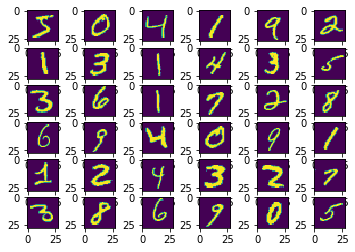

In [32]:
imax = 6
for i in range(imax):
    for j in range(imax):
        pl.subplot(imax,imax,i*imax+j+1)
        pl.imshow(train_input[i*imax+j])

**Figure 1:** The images show each of the number that are in the data once we plot it using the color scheme.

# Model

## Task 5

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

# Hyperparameters

## Task 6

In [0]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6443 - acc: 0.8359
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3642 - acc: 0.9023
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3108 - acc: 0.9143
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2821 - acc: 0.9220
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2696 - acc: 0.9259


## Task 7

In [36]:
test_loss, test_acc = model.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.2597 - acc: 0.9270


## Task 8

In [37]:
pred = model.predict(test_input, verbose=1)

10000/10000 [==============================] - 0s 29us/sample


Text(0.5, 1.0, 'Prediciton for number 9')

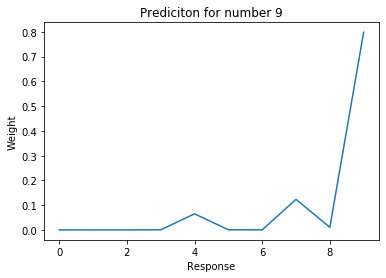

In [50]:
pl.plot(pred[9])
pl.xlabel('Response')
pl.ylabel('Weight')
pl.title('Prediciton for number 9')

**Figure 2:** The graph shows the probability that the model predicts it to be a certain number and in this case it was able to the predict that the number is a 9 because that is where we see the spike in the probability.

## Task 9

In [39]:
for i, pre in enumerate(pred):
    if np.argmax(pre) != test_labels[i]:
        print(i)
        firstfail = i
        break

8


Text(0.5, 1.0, 'Prediction')

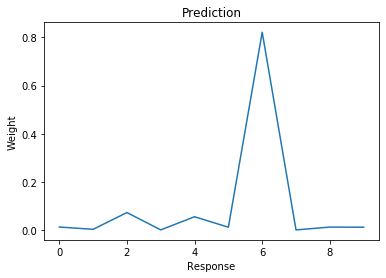

In [40]:
pl.plot(pred[firstfail])
pl.xlabel('Response')
pl.ylabel('Weight')
pl.title('Prediction for the first wrong prediciton')

**Figure 3:** The graph in this case shows that the spike for the prediction of the umber is at 6, but as we will see in the next color plot, the number resembles more to a 5 and that is why it is a wrong prediction.

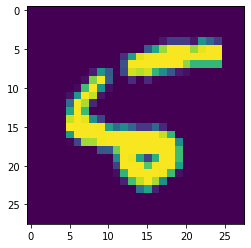

In [41]:
pl.imshow(test_input[firstfail])

**Figure 4:** The color plot for the first wrong prediciton, it shows that the number is a 5 but it is not very clear to distinguish it so it makes sense the computer had a hard time with it.

In [42]:
test_labels[firstfail]

5

It makes sense that this is a wrong prediction since the number is even hard to tell just by looking at it, therefore the model must have had a hard time classifying it.

## Task 10

In [0]:
model10 = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

In [44]:
model10.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model10.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 2.2972 - acc: 0.1273
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 2.2692 - acc: 0.1930
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 2.1670 - acc: 0.3124
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 1.7693 - acc: 0.4654
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 1.3593 - acc: 0.6208


In [45]:
test_loss10, test_acc10 = model10.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 38us/sample - loss: 1.1582 - acc: 0.7130


In [46]:
pred10 = model10.predict(test_input, verbose=1)

10000/10000 [==============================] - 0s 34us/sample


In [47]:
for i, pre in enumerate(pred10):
    if np.argmax(pre) != test_labels[i]:
        print(i)
        firstfail = i
        break

6


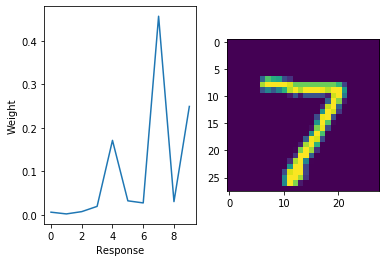

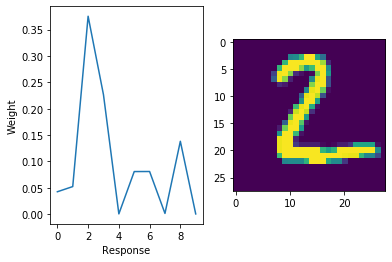

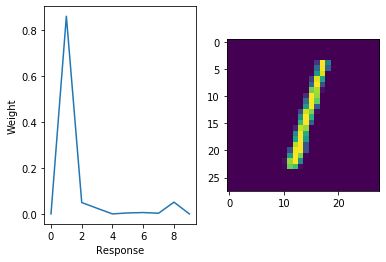

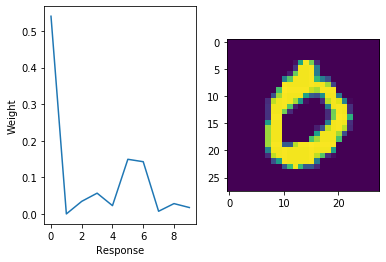

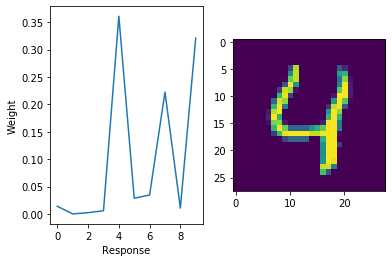

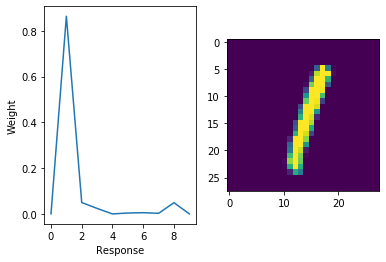

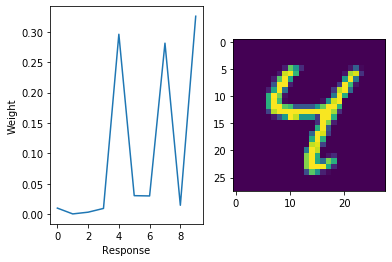

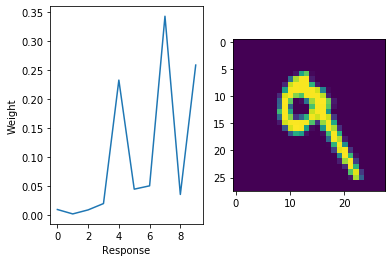

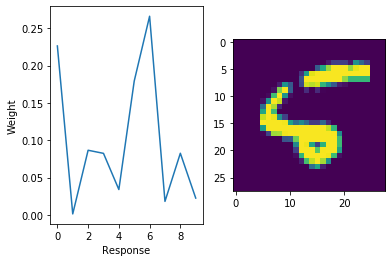

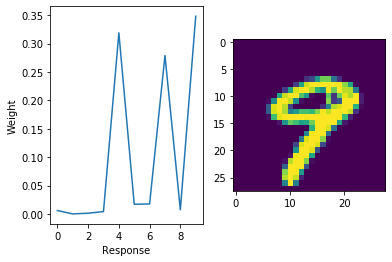

In [48]:
for i in range(10):
    pl.subplot(121)
    pl.plot(pred10[i])
    pl.xlabel('Response')
    pl.ylabel('Weight')
    pl.subplot(122)
    pl.imshow(test_input[i])
    pl.show()

**Figure 5:** The graphs shows the failed predictions that the model had and the color plot of how the numbers actually look like.

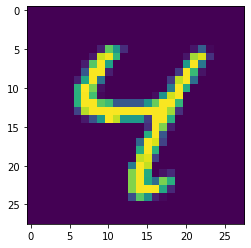

In [49]:
pl.imshow(test_input[firstfail])

**Figure 6:** The model give for the prediction said that it should be a 9 but it clearly looks like a 4

Yes, this is probably overfitting. This mistake is not quite as easy to understand outside of overfitting: that clearly looks like a *4* and not a *7* or a *9*. This issue might be something to do with having a (significantly) greater number of neurons than testing objects.